# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook consists of the step by step of Principal Component Analysis where I followed all the steps to conduct PCA correctly from scratch. I worked with the data from kaggle that talks about the Africa conflict, [click here to access the link to the dataset](https://www.kaggle.com/datasets/lumierebatalong/africa-conflict-19972020)

All the outputs are displayed for each code cell.

### Step 1: Load and Standardize the Data
Before applying PCA, I standardized the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - I followed standardization based on the image below

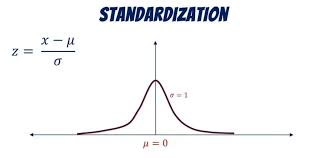


In [1]:
# Pre-steps -importing the required libraries necessary for the activity
# throughout and load the dataset I chose to work with.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mydata = pd.read_csv("/content/Africa_1997-2020_Jan08.csv", sep=';')
mydata

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34966,"-0,29",1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,404,KEN318,318,25-octobre-1998,1998,1,Violence against civilians,Attack,OLF: Oromo Liberation Front,Borana Ethnic Militia (Kenya),...,Township,Tuli,1643,40343,1,All Africa,Regional,OLF and Borana ethnic militia attack civilians...,28,1553544833
65531,404,KEN319,319,02-novembre-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),Students (Kenya),...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,University students protest over killing in Wa...,0,1567465412
65532,404,KEN320,320,10-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Garangs SPLA security men raid home of Kerubin...,0,1604344065
65533,404,KEN323,323,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Rival SPLA factions battle at police station,0,1583194169


In [2]:
'''
Just to make sure that I am working with correct datasets
I will print-out the info of the data set (rows and columns where culumns must be greater than 10), and the list of columns with som NaN values,
only to check if it has at least one column that is not numeric
and must have Missing Values or NaN Values.
'''
# Number of columns must be greater than 10
print(f'The number of columns is: {mydata.shape[1]}\nThe number of rows is: {mydata.shape[0]}\n')

# # Printing the info for showing the data types
# print(mydata.info())
# print('\n\n')
# Printing the list of columns with NaN values
detect_missing_values = mydata.isna() # Detect the missing value in the dataset
column_detected = detect_missing_values.any()
print('\n')

# Outputting the list column by which at least one value is NaN

list = mydata.columns[mydata.isna().any()].tolist()
print('The following are columns whose some values are NaN:')
for i in list:
  print(i)



The number of columns is: 29
The number of rows is: 65535



The following are columns whose some values are NaN:
ASSOC_ACTOR_1
ACTOR2
ASSOC_ACTOR_2
ADMIN3
NOTES


In [3]:
# Selecting only numeric columns found in the dataset
numeric_columns = mydata.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nThe numeric columns selected for Principal Component Analysis are: {numeric_columns}")

# Taking out only numeric data
numeric_data = mydata[numeric_columns].copy()



print(f"\nThe shape of new numeric data is: {numeric_data.shape}")
print(f"\nThe missing values in every numeric data:")
print(numeric_data.isnull( ).sum())


The numeric columns selected for Principal Component Analysis are: ['ISO', 'EVENT_ID_NO_CNTY', 'YEAR', 'TIME_PRECISION', 'INTER1', 'INTER2', 'INTERACTION', 'GEO_PRECISION', 'FATALITIES', 'TIMESTAMP']

The shape of new numeric data is: (65535, 10)

The missing values in every numeric data:
ISO                 0
EVENT_ID_NO_CNTY    0
YEAR                0
TIME_PRECISION      0
INTER1              0
INTER2              0
INTERACTION         0
GEO_PRECISION       0
FATALITIES          0
TIMESTAMP           0
dtype: int64


In [4]:
# Convert to numpy array for PCA implementation
data_array = numeric_data.values
print(f"\nFinal converted data array shape ready for PCA is as follow: {data_array.shape}")
# Printing some first 2 line for checking
print(data_array[:2])


Final converted data array shape ready for PCA is as follow: (65535, 10)
[[        12          1       1997          1          2          7
          27          1          5 1582579226]
 [        12          2       1997          1          2          7
          27          1          2 1582579226]]


In [5]:
# Step 1: Load and Standardize the data (use of numpy only allowed)


# Calculating the mean for each numeric column
mean = np.mean(data_array, axis=0)
print(f"\n* The Calculated means for each:")
for i, col in enumerate(numeric_columns):
    print(f"   {col}: {mean[i]:.2f}")

# Calculating the standard deviation for each numeric column
std = np.std(data_array, axis=0, ddof=0)
print(f"\n* TheCalculated standard deviations for each feature:")
for i, col in enumerate(numeric_columns):
    print(f"   {col}: {std[i]:.2f}")


# Standardizing the data with this formula (standardized_data = (data - mean) / std)
standardized_data = (data_array - mean) / std

print(f"Standardized data shape: {standardized_data.shape}")

# Display the first few rows of standardized data
print(standardized_data[:5])


* The Calculated means for each:
   ISO: 149.28
   EVENT_ID_NO_CNTY: 5613.92
   YEAR: 2012.98
   TIME_PRECISION: 1.13
   INTER1: 3.24
   INTER2: 3.41
   INTERACTION: 31.38
   GEO_PRECISION: 1.28
   FATALITIES: 5.92
   TIMESTAMP: 1577213127.94

* TheCalculated standard deviations for each feature:
   ISO: 92.71
   EVENT_ID_NO_CNTY: 6442.36
   YEAR: 7.20
   TIME_PRECISION: 0.39
   INTER1: 1.96
   INTER2: 2.96
   INTERACTION: 18.25
   GEO_PRECISION: 0.52
   FATALITIES: 55.83
   TIMESTAMP: 14854832.88
Standardized data shape: (65535, 10)
[[-1.48075333 -0.87125242 -2.22071747 -0.32195212 -0.63103215  1.21203986
  -0.2399595  -0.53495597 -0.01653076  0.36123584]
 [-1.48075333 -0.8710972  -2.22071747 -0.32195212 -0.63103215  1.21203986
  -0.2399595  -0.53495597 -0.07026269  0.36123584]
 [-1.48075333 -0.87094197 -2.22071747 -0.32195212 -0.63103215  1.21203986
  -0.2399595  -0.53495597 -0.07026269  0.36123584]
 [-1.48075333 -0.87078675 -2.22071747 -0.32195212 -0.63103215  1.21203986
  -0.23995

In [6]:
# Just ensuring standardizing went well, make sure the mean and std for new array are 0 and 1 respectively

mean = np.mean(standardized_data, axis=0)
print(f"\n* The Calculated means for each:")
for i, col in enumerate(numeric_columns):
    print(f"   {col}: {mean[i]:.2f}")

std = np.std(standardized_data, axis=0, ddof=0)
print(f"\n* TheCalculated standard deviations for each feature:")
for i, col in enumerate(numeric_columns):
    print(f"   {col}: {std[i]:.2f}")



* The Calculated means for each:
   ISO: 0.00
   EVENT_ID_NO_CNTY: -0.00
   YEAR: 0.00
   TIME_PRECISION: 0.00
   INTER1: -0.00
   INTER2: 0.00
   INTERACTION: 0.00
   GEO_PRECISION: 0.00
   FATALITIES: 0.00
   TIMESTAMP: 0.00

* TheCalculated standard deviations for each feature:
   ISO: 1.00
   EVENT_ID_NO_CNTY: 1.00
   YEAR: 1.00
   TIME_PRECISION: 1.00
   INTER1: 1.00
   INTER2: 1.00
   INTERACTION: 1.00
   GEO_PRECISION: 1.00
   FATALITIES: 1.00
   TIMESTAMP: 1.00


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [7]:
# Step 3: Calculate the Covariance Matrix

cov_matrix = np.cov(standardized_data, rowvar=False)
print(cov_matrix)


[[ 1.00001526 -0.04507218  0.03700334 -0.00398249  0.00460165  0.10896251
  -0.04352995  0.03388649 -0.0264012   0.14135838]
 [-0.04507218  1.00001526  0.49374362 -0.01299634  0.07313226  0.05397309
   0.10161906  0.05963063 -0.06069871  0.37376106]
 [ 0.03700334  0.49374362  1.00001526 -0.03425006  0.29040895 -0.01505517
   0.31243928  0.02686175 -0.14913839  0.32378628]
 [-0.00398249 -0.01299634 -0.03425006  1.00001526 -0.07223796  0.07958395
  -0.0238813   0.17023855  0.00213218 -0.01239177]
 [ 0.00460165  0.07313226  0.29040895 -0.07223796  1.00001526 -0.41479306
   0.77599428 -0.16414029 -0.03114602  0.01434697]
 [ 0.10896251  0.05397309 -0.01505517  0.07958395 -0.41479306  1.00001526
  -0.10593684  0.12501953  0.00277787 -0.02009818]
 [-0.04352995  0.10161906  0.31243928 -0.0238813   0.77599428 -0.10593684
   1.00001526 -0.12827882 -0.06338856 -0.02770376]
 [ 0.03388649  0.05963063  0.02686175  0.17023855 -0.16414029  0.12501953
  -0.12827882  1.00001526  0.02490269  0.02058983]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [8]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("The eigenvalues are:")
print(f"\n{eigenvalues}\n")
print("The eigenvvectors are:")
print(f"\n{eigenvectors}\n")
print(f"Number of eigenvalues: {len(eigenvalues)}")
print(f"Eigenvectors matrix shape: {eigenvectors.shape}") # Perform eigendecomposition
# eigenvalues, eigenvectors

The eigenvalues are:

[2.24732913 1.69048294 0.15548053 0.45285653 0.55346276 1.12548554
 1.04360479 1.01791864 0.89605599 0.81747575]

The eigenvvectors are:

[[-0.01376309  0.16501095 -0.07181828  0.10229317  0.29470135  0.09589805
  -0.78275382 -0.47845543 -0.13295073 -0.04019754]
 [ 0.29925186  0.5042394  -0.00290907  0.62156563  0.41872728  0.06631134
   0.25125855  0.12953965  0.09408903  0.03667164]
 [ 0.44358389  0.37468397 -0.00504234 -0.74426956  0.29386333 -0.03630895
   0.00112416  0.11286349  0.07689168 -0.05056574]
 [-0.09394273  0.10864387  0.01581838 -0.02322981  0.08893007 -0.70103655
   0.07010303 -0.14868142 -0.25605689  0.62179972]
 [ 0.55318915 -0.30677736  0.7201732   0.12300774 -0.08234034 -0.14631069
  -0.06456391 -0.17202496 -0.00181248 -0.0643269 ]
 [-0.24491833  0.32574303  0.28197106  0.01275756 -0.25580814 -0.16793885
  -0.28650042  0.14240473  0.73795269  0.11687182]
 [ 0.51804678 -0.22998877 -0.62902276  0.14191864 -0.24144196 -0.28315056
  -0.13058525 -0

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [9]:
# Step 5: Sort Principal Components

sorted_indices = np.argsort(eigenvalues)[::-1]

print(f"\n* Sorted indices (descending eigenvalue order):")
print(f"{sorted_indices}\n")

sorted_eigenvalues = eigenvalues[sorted_indices]
print(f"* The sorted eigenvalues acording to descending order are:")
print(f"\n{sorted_eigenvalues}\n")
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print(f"* The sorted eigenvectors acording to descending order are:")
print(f"\n{sorted_eigenvectors}\n")



* Sorted indices (descending eigenvalue order):
[0 1 5 6 7 8 9 4 3 2]

* The sorted eigenvalues acording to descending order are:

[2.24732913 1.69048294 1.12548554 1.04360479 1.01791864 0.89605599
 0.81747575 0.55346276 0.45285653 0.15548053]

* The sorted eigenvectors acording to descending order are:

[[-0.01376309  0.16501095  0.09589805 -0.78275382 -0.47845543 -0.13295073
  -0.04019754  0.29470135  0.10229317 -0.07181828]
 [ 0.29925186  0.5042394   0.06631134  0.25125855  0.12953965  0.09408903
   0.03667164  0.41872728  0.62156563 -0.00290907]
 [ 0.44358389  0.37468397 -0.03630895  0.00112416  0.11286349  0.07689168
  -0.05056574  0.29386333 -0.74426956 -0.00504234]
 [-0.09394273  0.10864387 -0.70103655  0.07010303 -0.14868142 -0.25605689
   0.62179972  0.08893007 -0.02322981  0.01581838]
 [ 0.55318915 -0.30677736 -0.14631069 -0.06456391 -0.17202496 -0.00181248
  -0.0643269  -0.08234034  0.12300774  0.7201732 ]
 [-0.24491833  0.32574303 -0.16793885 -0.28650042  0.14240473  0.737

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [13]:
# Step 6: Project Data onto Principal Components

# Calculating explained variance for each component for the process of selecting number of PCs to keep
totalVar = np.sum(sorted_eigenvalues)
explainedVarRatio = sorted_eigenvalues / totalVar
cumulativeVarRatio = np.cumsum(explainedVarRatio)

print(f"* The explained variance ratio for each component is: {explainedVarRatio}\n")
print(f"* The cumulative variance ratio is: {cumulativeVarRatio}\n")

# By taking 0.85+ as a threshold, i will find the number of componets i will keep, to get the cumulatveVarRatio of >=0.85 (someone could say 85%, but "%" is the consitant still)

num_components = 1 # initiating the number of components to 1 bcs i will add the index to where we started having the threshold and have the total numbers of PCs
for i, num in enumerate(cumulativeVarRatio):
  if num >= 0.85:
    num_components += i
    break
print(f"The num_component = {num_components}")

# Select top eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
print(f"The selected eigenvectors shape: {selected_eigenvectors.shape}")

# Project data onto principal components
reduced_data = np.dot(standardized_data, selected_eigenvectors)



* The explained variance ratio for each component is: [0.22472948 0.16904571 0.11254684 0.10435889 0.10179031 0.08960423
 0.08174633 0.05534543 0.04528496 0.01554782]

* The cumulative variance ratio is: [0.22472948 0.3937752  0.50632203 0.61068092 0.71247123 0.80207546
 0.88382179 0.93916722 0.98445218 1.        ]

The num_component = 7
The selected eigenvectors shape: (10, 7)


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [11]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}\n')  # Display reduced data shape
print(reduced_data[:5])  # Display the first few rows of reduced data

Reduced Data Shape: (65535, 7)

[[-1.81758015 -0.8821104   0.44364836  0.6040925   0.67958224  0.82410024
   0.58944694]
 [-1.81176746 -0.8783176   0.43811202  0.580228    0.72007228  0.80232757
   0.58835364]
 [-1.81172101 -0.87823933  0.43812231  0.580267    0.72009239  0.80234218
   0.58835933]
 [-1.83858371 -0.89549553  0.46401688  0.6918557   0.53125278  0.90403074
   0.59349366]
 [-1.84238142 -0.89789361  0.46772492  0.70783037  0.50429293  0.9185702
   0.59423201]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

These are the numeric columns found:
['ISO', 'EVENT_ID_NO_CNTY', 'YEAR', 'TIME_PRECISION', 'INTER1', 'INTER2', 'INTERACTION', 'GEO_PRECISION', 'FATALITIES', 'TIMESTAMP']



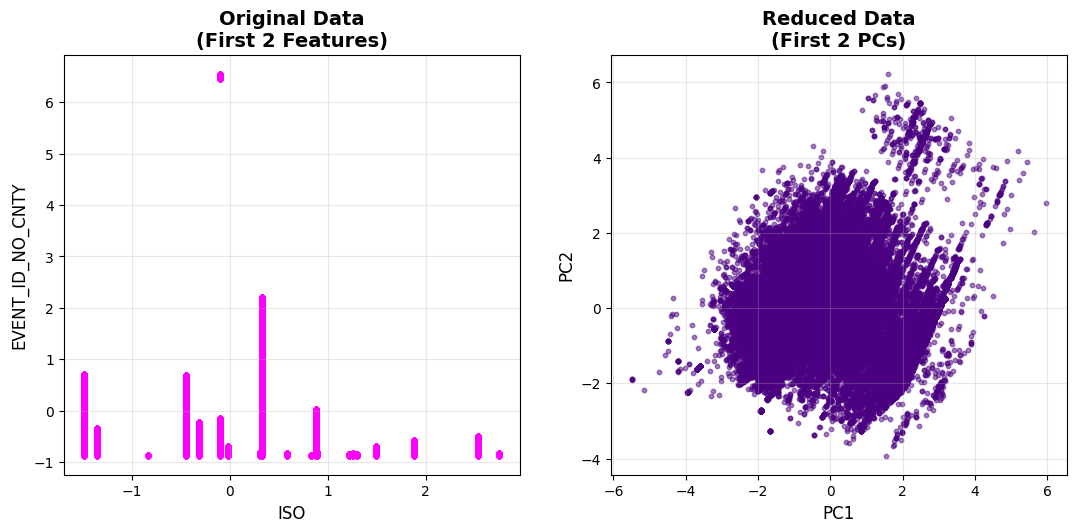

In [12]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)
fig = plt.figure(figsize=(20, 12))

# Plotting the first two features
ax1 = plt.subplot(2, 3, 1)
# reminding the numeric columns
print(f"These are the numeric columns found:\n{numeric_columns}\n")
plt.scatter(standardized_data[:, 0], standardized_data[:, 1],
            alpha=0.5, c='magenta', s=10)
plt.xlabel(f'{numeric_columns[0]}', fontsize=12)
plt.ylabel(f'{numeric_columns[1]}', fontsize=12)
plt.title('Original Data\n(First 2 Features)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)


# Plot reduced data after PCA
ax2 = plt.subplot(2, 3, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            alpha=0.5, c='indigo', s=10)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Reduced Data\n(First 2 PCs)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)


## Conclusion

### PCA Results Summary:
- **Original Dimensions:** 10 features
- **Reduced Dimensions:** 7 principal components
- **Variance Retained:** 88.38%
- **Dimensionality Reduction:** 20%

### Key Findings:
1. PC1 explains 22.47% of variance - primarily driven by INTER1 and INTERACTION
2. PC2 explains 16.90% of variance - primarily driven by EVENT_ID_NO_CNTY
3. First 3 PCs together explain 50.63% of total variance

### Visualization Insights:
The comparison of original vs. PCA-transformed data shows how PCA
successfully creates a new coordinate system that better captures the
variance structure of the data. The original discrete features (like ISO)
are transformed into continuous principal components that are uncorrelated.


PCA successfully reduced the dimensionality of the African conflict dataset
from 10 to 7 dimensions while retaining 88.83% of the information, making
the data more manageable while preserving its essential structure.
